In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
# Read in data
data = pd.read_csv('master.csv')

# Number of rows and columns
print(data.shape)

# Display first 5 rows
data.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [9]:
#Dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [18]:
#Applying Pearson Correlation
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


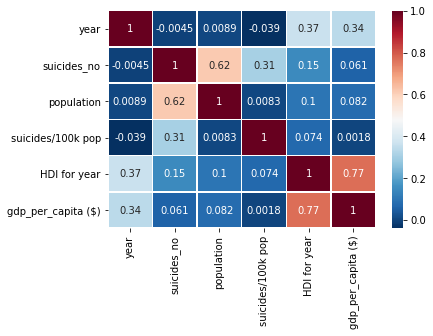

In [20]:
#To make this look beautiful and easier to interpret, add this after calculating the Pearson coefficient of correlation.
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [16]:
# Number of unique values in categorical columns
categoricals = data.select_dtypes(['object'])
display(categoricals.nunique())

country                101
sex                      2
age                      6
country-year          2321
 gdp_for_year ($)     2321
generation               6
dtype: int64

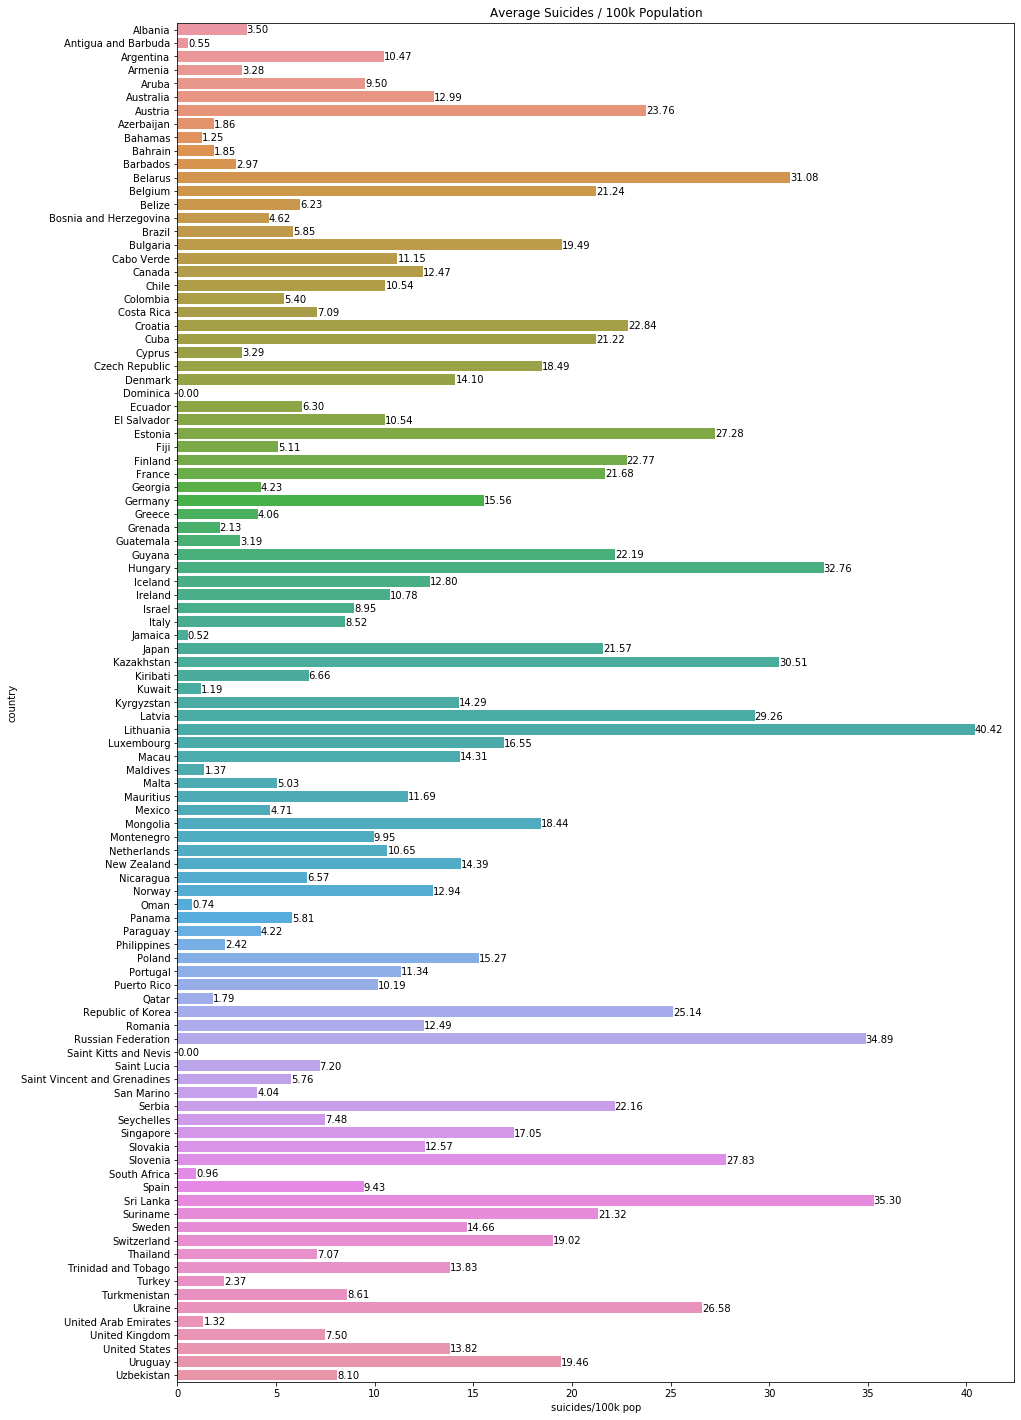

In [17]:
# Average Country Population Plot
plt.figure(figsize=(15,25))
plt.title('Average Suicides / 100k Population')
ax = sns.barplot(x='suicides/100k pop',y='country',data=data,ci=None)

# Annotate counrties           
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
plt.show()

In [22]:
#Top 10 countries with highest average suicide rate
data_by_country_mean = data.groupby('country').mean()
mean_suicides = data_by_country_mean[['suicides/100k pop']]
mean_suicides.sort_values('suicides/100k pop',ascending=False)[:10]

,suicides/100k pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
Kazakhstan,30.511282
Latvia,29.259325
Slovenia,27.827857
Estonia,27.276905


In [23]:
#Lowest 10 countries with lowest average suicide rate
mean_suicides.sort_values('suicides/100k pop')[:10]

,suicides/100k pop
country,
Saint Kitts and Nevis,0.000000
Dominica,0.000000
Jamaica,0.521765
Antigua and Barbuda,0.552901
Oman,0.736111
South Africa,0.964542
Kuwait,1.186433
Bahamas,1.247391
United Arab Emirates,1.317917


In [24]:
# Group data by year
data_by_year = data.groupby('year').sum()

# Display first and last 5 rows
display(data_by_year.head())
display(data_by_year.tail())

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1985,116063,1008600086,6811.89,310.428,3508548
1986,120670,1029909613,6579.84,0.000,4104636
1987,126842,1095029726,7545.45,0.000,5645760
1988,121026,1054094424,7473.13,0.000,5870508
1989,160244,1225514347,8036.54,0.000,6068424


,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
2012,230160,1912812088,11101.91,753.036,26058300
2013,223199,1890161710,10663.64,746.880,26911368
2014,222984,1912057309,10306.73,727.668,25665252
2015,203640,1774657932,8253.99,0.000,19516008
2016,15603,132101896,2147.39,0.000,4106420


In [26]:
# Remove 2016
data_by_year = data_by_year[:-1]

# Rescale columns betwwen 0 - 1 to visualize on one plot
def rescale(values):
    max_val = max(values)
    min_val = min(values)
    scaled_values = []
    for val in values:
        try:
            new_val = (val - min_val) / (max_val - min_val)
            scaled_values.append(new_val)
        # Handle null values
        except:
            scaled_values.append(np.nan)
    return scaled_values
# Apply rescaling function to all columns
rescaled = data_by_year.apply(rescale)

# Display first and last 5 rows
display(rescaled.round(2).head())
display(rescaled.tail())

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1985,0.00,0.00,0.03,0.39,0.00
1986,0.03,0.02,0.00,0.00,0.03
1987,0.08,0.09,0.12,0.00,0.09
1988,0.04,0.05,0.11,0.00,0.10
1989,0.32,0.22,0.18,0.00,0.11


,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
2011,0.859806,0.996020,0.592543,0.966604,0.999997
2012,0.814653,0.914549,0.559633,0.941036,0.962527
2013,0.764951,0.891640,0.505395,0.933343,0.998940
2014,0.763416,0.913786,0.461225,0.909335,0.945750
2015,0.625300,0.774815,0.207186,0.000000,0.683272


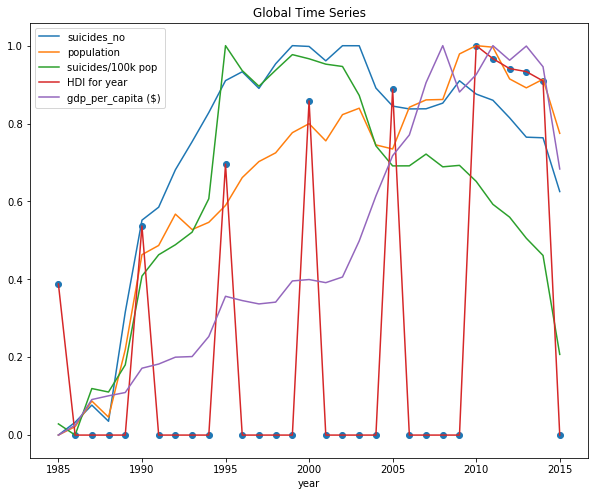

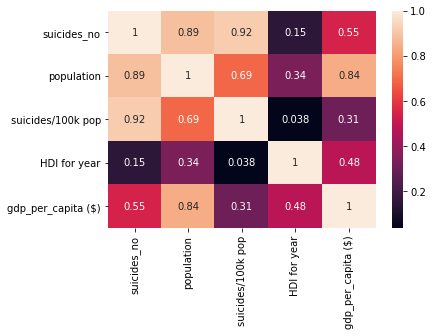

In [27]:
# Plot Global Time Series Data
# Scatter plot HDI for year due to incontinuous data
rescaled.plot(figsize=(10,8))
plt.scatter(x=rescaled.index, y=rescaled['HDI for year'])
plt.title('Global Time Series')
plt.show()

# Show correlation heatmap
sns.heatmap(rescaled.corr(),annot=True)
plt.show()

In [32]:
# Create pie charts of suicide numbers and population by category
def pie_chart(dataframe, group_col):
    columns = [group_col, 'suicides_no','population']
    grouped_sum = dataframe[columns].groupby(group_col).sum()
    display(grouped_sum)
    
    fig = plt.figure()

    ax1 = fig.add_axes([0, 0, .65, .65])
    ax1.pie(grouped_sum.population,
            labels=grouped_sum.index,
            autopct='%1.1f%%')
    ax1.set_title('Global Population 1985-2016')

    ax2 = fig.add_axes([.65, 0, .65, .65])
    ax2.pie(grouped_sum.suicides_no,
            labels=grouped_sum.index,
            autopct='%1.1f%%')
    ax2.set_title('Global Suicides 1985-2016')

    plt.show()
    
# Create plots of suicide numbers and population by category
def plot_time_series(dataframe, group_col):
    categories = dataframe[group_col].unique()
    for category in categories:
        df = dataframe[dataframe[group_col] == category][
            [group_col,'year','suicides_no','population']]
        # Exclude 2016
        group_data = df.groupby('year').mean()[:-1]
        group_data.apply(rescale).plot(figsize=(10,2))
        plt.title(category)
        plt.show()

,suicides_no,population
age,,
15-24 years,808542,8642946896
25-34 years,1123912,8438103587
35-54 years,2452141,14375888123
5-14 years,52264,8398693237
55-74 years,1658443,8803245340
75+ years,653118,2663281253


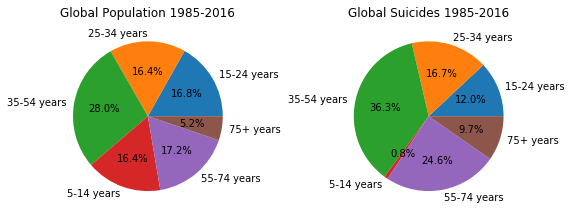

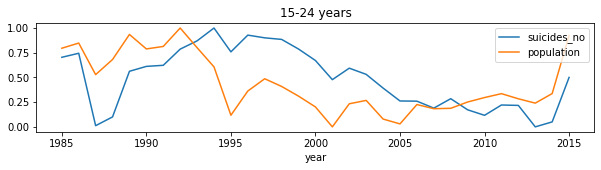

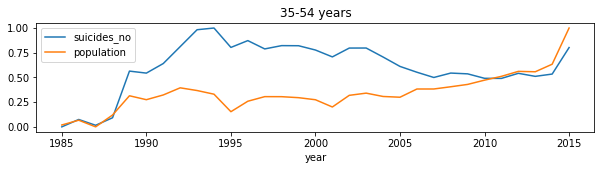

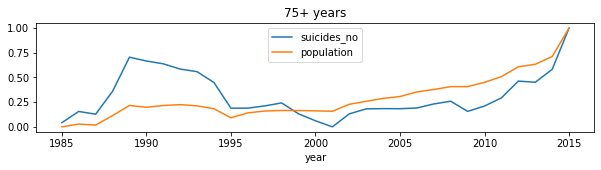

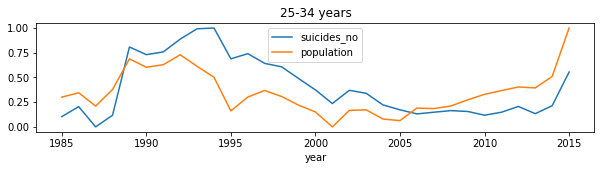

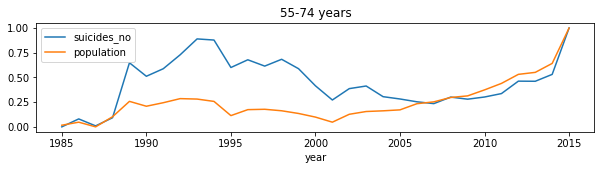

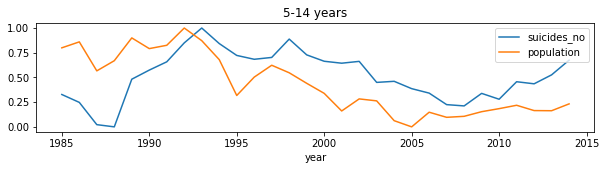

In [33]:
pie_chart(data, 'age')
plot_time_series(data, 'age')

,suicides_no,population
sex,,
female,1559510,26272781857
male,5188910,25049376579


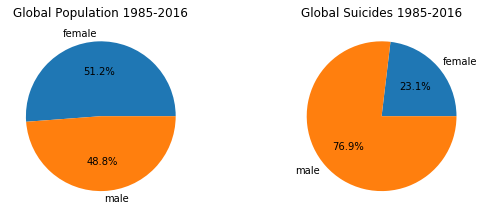

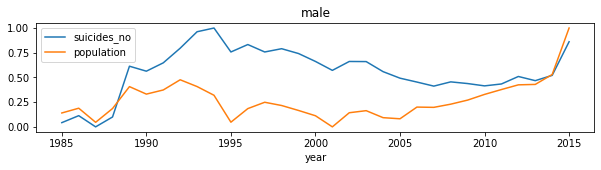

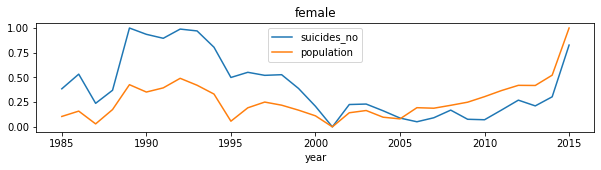

In [34]:
pie_chart(data, 'sex')
plot_time_series(data, 'sex')